<a href="https://colab.research.google.com/github/AriKlein/intro_rl_project/blob/main/intro_rl_final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Reinforcement Learning Final Project
# Ari Klein (aeklein)



# 1)  Describe the methods and variables in the class DiscreteEnv which is the parent class of the Taxi V3 class.

DiscreteEnv has member data:
-	nS and nA capturing the number of states and actions, respectively.  
-	isd, which is a list of length nS giving the probability, for each state, that the initial state gets set to that state for any given call to reset()
-	P, which is a dictionary storing, for each {state, action} pair, the corresponding next state, the corresponding reward, and whether, after taking that action from the initial state, the system is now in a terminal state.  If the transitions are probabilistic, it stores all possible sets of {next_state, reward, done} in a list along with the probability associated with each possible {next_state, reward, done}
-	lastaction, which stores the previous action taken
-	s, which stores the current state
-	action_space and observation_space, which are discrete spaces of size nA and nS, respectively, representing the space of possible actions and states, respectively. 
DiscreteEnv has member functions (e.g. methods):
-	init for constructing a DiscreteEnv object with member data set to the values specified in its arguments
-	seed for setting the seed for the RNG to a specified value or to a random one if no value is specified
-	reset, which resets the system by setting the state to an initial state sampled from the set of possible states according to distribution isd.  Also sets lastaction to None
-	step, which takes an action, moves from the current state to the next state based on that action, and returns the next state, associated reward, and whether the system is now in a terminal state.  


DiscreteEnv has member functions (e.g. methods):
-	init for constructing a DiscreteEnv object with member data set to the values specified in its arguments
-	seed for setting the seed for the RNG to a specified value or to a random one if no value is specified
-	reset, which resets the system by setting the state to an initial state sampled from the set of possible states according to distribution isd.  Also sets lastaction to None
-	step, which takes an action, moves from the current state to the next state based on that action, and returns the next state, associated reward, and whether the system is now in a terminal state.  


# 2) Describe the methods and variables in the Taxi V3 class.

As TaxiEnv inherits DiscreteEnv, it has all the data and functions described above:
-	The state captures the location on the map (out of 25 possible locations), the passenger location (5 total, including the possibility that the passenger is in the taxi), and the destination locations (out of 4 possible), for a total of nS = 25 X 5 X 4 = 500 possible states.
-	From each state, it is possible to move in any of 4 directions, or do a pickup, or do a dropoff, for a total of nA=6 possible actions.
-	The initial state is a randomly chosen state from the 500 (= 5 X 5 X 5 X 4) possible states, subject to the constraint that the (initial) passenger location cannot be equal to the destination location (ruling out 5 X 5 X 4=100 possible states), nor can the passenger initially be inside the taxi, ruling out passenger location index 4, corresponding to 5 X 5 X 4 = 100 possible states.  This leaves 300 valid possible initial states, with the initial state being equally likely (e.g., with probability of 1/300) to be any one of these valid states.  isd is thus set to 1/300 for each of the 300 valid possible initial states, and 0 for the invalid initial states.
-	The P dictionary captures the set of possible next states resulting from taking any action in any state, along with their associated probabilities, rewards, and whether they are terminal states.  Since the taxi environment is fully deterministic, there is only a single possible next state resulting from any action in any state, and it is assigned a probability of 1.  The only scenario resulting in a terminal state is performing a drop-off when the passenger is in the taxi and the taxi is at the correct destination.  Almost all actions in all states are assigned a reward of -1, with 3 exceptions:
 - Attempting a pickup when the passenger is either already in the taxi or not at the same location as the taxi is an illegal pickup and results in a reward of -10.
 - Attempting a drop-off when the passenger is either not in the taxi, or when the taxi is not in one of the four marked locations is an illegal drop-off and results in a reward of -10.
 - Performing a drop-off when the passenger is in the taxi and the taxi is at the correct destination, which results in a reward of 20.

The new member data which are unique to the Taxi environment (e.g., not inherited from DiscreteEnv) are:
-	desc, which captures the text-based map of the environment
-	locs, which captures the possible pickup and dropoff locations as an array of ordered pairs on a 5X5 grid.

The member functions are as follows:
-	init sets the member data as described above.  
-	reset resets the state of the environment to a random (uniformly distributed) state from the set of valid initial states, meaning that the initial taxi location, passenger location, and destination, are randomly chosen upon any call to reset.
-	step takes an action, moves from the current state to the next state based on that action, and returns the next state, associated reward, and whether the system is now in a terminal state.  
-	encode converts a tuple containing the taxi row (0 to 4 going from north to south), taxi column (0 to 4 going from west to east), passenger location (index in locs, or 4 to indicate the passenger is in the taxi), and desired destination, and converts this tuple to a single number in [0,499].  In other words, it converts a logical representation of the state to a single integer representing the state.
-	decode does the inverse of encode, namely converting a single integer representing the state into the corresponding taxi row, taxi column, passenger location and desired destination.
-	render depicts the environment and current state in an intuitive, human-readable, text-based format, where the taxi is shown on the map in its current location, with the taxi colored green if it has already successfully picked up the passenger, and yellow otherwise.  The location with the passenger (pre-pickup) is colored blue, while the desired destination is colored magenta.


# 3) Describe the Taxi V3 environment, its actions, states, reward structure and the rationale behind such a reward structure.

The Taxi V3 environment consists of a taxi agent which is initially at some random location on the below map:

```
MAP = [
    "+---------+",
    "|R: | : :G|",
    "| : | : : |",
    "| : : : : |",
    "| | : | : |",
    "|Y| : |B: |",
    "+---------+",
]
```
where the above map is illustrating a 5X5 grid.  The taxi can try to move north, east, west, or south, but will only be able to successfully move east or west through a `':'`.  There is a passenger randomly placed in the environment at one of the four location marked R, G, B, or Y, with a (different) desired destination that is randomly either R, G, B, or Y.  The goal of the taxi agent is to:
 - move to the passenger location
 - pick up the passenger at the passenger location, at which point the passenger is inside the taxi
 - move to the destination location
 - drop off the passenger at the destination location

The taxi agent can always attempt to take one of 6 possible actions:
- move south, north, east or west (actions 0-3, respectively)
- pick up a passenger (action 4)
- drop off a passenger (action 5)

The state captures the location of the taxi agent on the map (out of 25 possible locations), the passenger location (5 total, including the possibility that the passenger is in the taxi), and the destination locations (out of 4 possible), for a total of 25 X 5 X 4 = 500 possible states.

Almost all actions in all states are assigned a reward of -1, with 3 exceptions:
- Attempting a pickup when the passenger is either already in the taxi or not at the same location as the taxi is an illegal pickup and results in a reward of -10.
- Attempting a drop-off when the passenger is either not in the taxi, or when the taxi is not in one of the four marked locations is an illegal drop-off and results in a reward of -10.
- Performing a drop-off when the passenger is in the taxi and the taxi is at the correct destination, which results in a reward of 20.

The reward for successful completion of the final objective is to encourage the agent to successfully complete the objective; this reward needs to be effectively "propagated" backwards to encourage actions which lead the agent closer to acheiving the objective.  The rationale behind the default reward of -1 for almost all steps is to encourage the agent to acheive the goals described above in as few steps as possible (e.g., to encourage efficiency).  The relatively large penalties for illegal pickups and dropoffs are to strongly discourage the agent from taking such actions.  

# 4-6)

Below are my implementations of SARSA and Q-learning, which both call my implementation of epsilon_greedy_action_from_Q.  The code for these three methods is largely based off the W3S2 and W4S1 solution branches (for example, https://github.com/KnowchowHQ/rl-in-action/blob/solution/C1-RL-Intro/W4S1/foolsball-v3.ipynb) which is in turn based off https://lilianweng.github.io/lil-log/2018/02/19/a-long-peek-into-reinforcement-learning.html#sarsa-on-policy-td-control. 
My main changes to this code were:
 - The addition of hyperparameter `max_episode_length` for forcing episode end if taxi is looping
 - The addition of hyperparameter `num_exploration_episodes` to force exploration (epsilon=1) for several episodes before starting exploitation (epsilon decay)
 - The addition of hyperparameter `num_episodes_with_some_exploration` for forcing epsilon to 0 to force greedy policy for the purpose of calculating rubric metrics.
 - Calculating and returning the accumulated, non-discounted reward for each episode and checking whether each episode contains any illegal actions.  These are needed to evaluate algorithm performance against the rubric.  Since we should always be taking greedy actions fot the rubric, epsilon should be set to 0 for at least the last 1000 episodes (or 1100 to get 1000 sliding windows of length 100).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
from tqdm import tqdm

import gym

# Given:
# - a pandas table, Q, of discounted returns for for each action (columns) from each state (rows)
# - a state
# - an epsilon value
# Returns an action sampled from a probability distribution wherein:
# - The greedy action is taken with probability (1-epsilon) + epsilon/nA  (nA is number of possible actions)
# - Any single non-greedy action can be taken with probability epsilon/nA  (nA is number of possible actions)
# When epsilon=0, the below always gives the greedy action
# When epsilon=1, the action is completely random (e.g., sampled from a uniform dist. across the possible actions)
def epsilon_greedy_action_from_Q(Q, state, epsilon):
    actions = Q.columns
    action_probs = np.asarray([epsilon / len(actions)] * len(actions), dtype=np.float)

    greedy_action_index = np.argmax(Q.loc[state].values)
    action_probs[greedy_action_index] += 1 - epsilon

    epsilon_greedy_action = np.random.choice(Q.columns, p=action_probs)

    return epsilon_greedy_action

# Implements sarsa, given a taxi agent and a dictionary of hyperparameters
# Returns:
#   - Pandas table of discounted returns for for each action (columns) from each state (rows)
#   - numpy array of length n_episodes with reward for each epsiode.  Generally non-dsicounted but using epsilon-greedy policy.  By forcing epsilon to 0 for the last 1100 episodes, can get greedy rewards.
#   - numpy array of length n_episodes with a '1' if the episode had at least 1 illegal action (action resulting in reward of -10), and a '0' if no illegal action was taken in the epsiode.
def sarsa(taxi, HYPER_PARAMS):

    actions_np = np.arange(taxi.nA)
    states_np = np.arange(taxi.nS)

    gamma = HYPER_PARAMS['gamma'] # parameter for discounted returns to encourage finding quickest route
    n_episodes = HYPER_PARAMS['n_episodes']   # number of episodes to run
    epsilon_decay = HYPER_PARAMS['epsilon_decay']   # controls exploration/exploitation tradeoff
    min_epsilon = HYPER_PARAMS['min_epsilon']  # controls at what point to stop decaying epsilon (e.g., max exploitation we allow)
    alpha = HYPER_PARAMS['alpha'] # effective learning rate telling us how to weight current return against value already in table

    max_episode_length = HYPER_PARAMS['max_episode_length'] # max length of episode before forcing a reset in sarsa or q-learning
    num_exploration_episodes = HYPER_PARAMS['num_exploration_episodes'] # num episodes to force explore before starting to decay epsilon
    num_episodes_with_some_exploration = HYPER_PARAMS['num_episodes_with_some_exploration']

    Q = pd.DataFrame.from_dict({s: {a: 0 for a in actions_np} for s in states_np}, orient='index')

    epsilon = 1
    rewards = np.zeros(n_episodes)
    had_illegal_action = np.zeros(n_episodes) # 0 if no illegal action in the episode.  1 if had illegal action


    for i in tqdm(range(n_episodes)):
        s0 = taxi.reset()
        a0 = epsilon_greedy_action_from_Q(Q, s0, epsilon)
        #s0 = foolsball.init_state
        done = False
        current_episode_length=0
        episode_reward = 0
        episode_had_illegal_action = 0

        while (not done) and (current_episode_length < max_episode_length):

            s1, reward, done, dummy_prob = taxi.step(a0)
            a1 = epsilon_greedy_action_from_Q(Q, s1, epsilon)
            Q.loc[s0, a0] += alpha * (reward + gamma * Q.loc[s1, a1] - Q.loc[s0, a0])
            s0 = s1
            a0 = a1
            current_episode_length = current_episode_length+1

            # For the rubric, need to calculate the reward and check whether illegal actions taken based on greedy choice:  epsilon=0
            # I will therefore force my epsilon to zero after a certain number of episodes, after which the below will be based on greedy
            # actions instead of epsilon-greedy
            episode_reward += reward
            if reward == -10:
                episode_had_illegal_action = 1

        if i > num_exploration_episodes:
            epsilon *= epsilon_decay
            epsilon = max(epsilon, min_epsilon)

        # for the rubric, need to calculate the reward and check whether illegal actions taken based on greedy choice:  epsilon=0
        # I will therefore force my epsilon to zero after a certain number (num_episodes_with_some_exploration) of episodes.
        # Will generally want this to be ~ 1100 less than total num episodes so that get at least 1100 episodes for rubric
        if i > num_episodes_with_some_exploration:
            epsilon = 0

        rewards[i] = episode_reward
        had_illegal_action[i] = episode_had_illegal_action

    return Q, rewards, had_illegal_action

# Implements Q-learning, given a taxi agent and a dictionary of hyperparameters
# Returns:
#   - Pandas table of discounted returns for for each action (columns) from each state (rows)
#   - numpy array of length n_episodes with reward for each epsiode.  Generally non-dsicounted but using epsilon-greedy policy.  By forcing epsilon to 0 for the last 1100 episodes, can get greedy rewards.
#   - numpy array of length n_episodes with a '1' if the episode had at least 1 illegal action (action resulting in reward of -10), and a '0' if no illegal action was taken in the epsiode.
def q_learning(taxi, HYPER_PARAMS):

    actions_np = np.arange(taxi.nA)
    states_np = np.arange(taxi.nS)

    gamma = HYPER_PARAMS['gamma'] # parameter for discounted returns to encourage finding quickest route
    n_episodes = HYPER_PARAMS['n_episodes']   # number of episodes to run
    epsilon_decay = HYPER_PARAMS['epsilon_decay']   # controls exploration/exploitation tradeoff
    min_epsilon = HYPER_PARAMS['min_epsilon']  # controls at what point to stop decaying epsilon (e.g., max exploitation we allow)
    alpha = HYPER_PARAMS['alpha'] # effective learning rate telling us how to weight current return against value already in table

    max_episode_length = HYPER_PARAMS['max_episode_length'] # max length of episode before forcing a reset in sarsa or q-learning
    num_exploration_episodes = HYPER_PARAMS['num_exploration_episodes'] # num episodes to force explore before starting to decay epsilon
    num_episodes_with_some_exploration = HYPER_PARAMS['num_episodes_with_some_exploration']

    Q = pd.DataFrame.from_dict({s: {a: 0 for a in actions_np} for s in states_np}, orient='index')

    epsilon = 1
    rewards = np.zeros(n_episodes)
    had_illegal_action = np.zeros(n_episodes) # 0 if no illegal action in the episode.  1 if had illegal action


    for i in tqdm(range(n_episodes)):
        s0 = taxi.reset()
        #s0 = foolsball.init_state
        done = False
        current_episode_length=0
        episode_reward = 0
        episode_had_illegal_action = 0

        while (not done) and (current_episode_length < max_episode_length):
            a0 = epsilon_greedy_action_from_Q(Q, s0, epsilon)
            s1, reward, done, dummy_prob = taxi.step(a0)
            Q.loc[s0, a0] += alpha * (reward + gamma * Q.loc[s1].max() - Q.loc[s0, a0])
            s0 = s1
            current_episode_length = current_episode_length+1

            # For the rubric, need to calculate the reward and check whether illegal actions taken based on greedy choice:  epsilon=0
            # I will therefore force my epsilon to zero after a certain number of episodes, after which the below will be based on greedy
            # actions instead of epsilon-greedy
            episode_reward += reward
            if reward == -10:
                episode_had_illegal_action = 1

        if i > num_exploration_episodes:
            epsilon *= epsilon_decay
            epsilon = max(epsilon, min_epsilon)

        # for the rubric, need to calculate the reward and check whether illegal actions taken based on greedy choice:  epsilon=0
        # I will therefore force my epsilon to zero after a certain number (num_episodes_with_some_exploration) of episodes.
        # Will generally want this to be ~ 1100 less than total num episodes so that get at least 1100 episodes for rubric
        if i > num_episodes_with_some_exploration:
            epsilon = 0

        rewards[i] = episode_reward
        had_illegal_action[i] = episode_had_illegal_action

    return Q, rewards, had_illegal_action

I defined the following 8 hyperparameters (description of each given in code comments):

In [2]:
MY_HYPER_PARAMS = {}
MY_HYPER_PARAMS['gamma'] = 0.9 # parameter for discounted returns to encourage finding quickest route.
MY_HYPER_PARAMS['n_episodes'] = 10000  # number of episodes to run
MY_HYPER_PARAMS['epsilon_decay'] = 0.99  # controls exploration/exploitation tradeoff
MY_HYPER_PARAMS['min_epsilon'] = 0.05  # controls at what point to stop decaying epsilon (e.g., max exploitation we allow)
MY_HYPER_PARAMS['alpha'] = 0.1  # effective learning rate telling us how to weight current return against value already in table
MY_HYPER_PARAMS['max_episode_length'] = 50 # max length of episode before forcing a reset in sarsa or q-learning
MY_HYPER_PARAMS['num_exploration_episodes'] = 500  # num episodes to force explore before starting to decay epsilon

# for the rubric, need to calculate the reward and check whether illegal actions taken based on greedy choice:  epsilon=0
# I will therefore force my epsilon to zero after a certain number (num_episodes_with_some_exploration) of episodes.
# Will generally want this to be ~ 1100 less than total num episodes so that get at least 1100 episodes for rubric
MY_HYPER_PARAMS['num_episodes_with_some_exploration'] = MY_HYPER_PARAMS['n_episodes'] - 1102

I preferred to work on my local machine in PyCharm for the enhanced debugging capabilities offered by that IDE.  My hyperparameter values resulted largely from trial-and-error in PyCharm, largely with the Q-learning algorithm, by inspection of the plot of windowed_rewards (see below) and the rubric values (e.g., 5th and 95th percentile rewards) for different hyperparameter settings.  For example:
- I found that reducing `alpha` below 0.1 reduced convergence speed (e.g., I had to run for more episodes to get same result) without improving performance, so I am setting `alpha` to 0.1.
- The `epsilon_decay value` of 0.99 implies that once we start allowing decay (after an initial exploration period of `num_exploration_episodes=500`) , it takes log(`min_epsilon`)/log(0.99) ~ 300 episodes to transition from full exploration to almost full exploitation. 
- Since there are 25 locations on the MAP, and we need to both pick up and dropoff the passenger, it seems reasonable to set the `max_episode_length` to 50.
- The `num_episodes_with_some_exploration` is not really a hyperparameter.  I added it to force epsilon to 0 for the last 1100 episodes so that the last 1100 values in the vectors used for the rubric (e.g., the rewards vector and vector verifying that no illegal actions are taken) reflect episodes based entirely on greedy actions.  

In [3]:
# Define the MAP, initialize the taxi environment, and check that we can reset and render

MAP = [
    "+---------+",
    "|R: | : :G|",
    "| : | : : |",
    "| : : : : |",
    "| | : | : |",
    "|Y| : |B: |",
    "+---------+",
]
global_taxi = gym.make('Taxi-v3')
global_taxi.reset()
global_taxi.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



100%|██████████| 10000/10000 [02:52<00:00, 58.00it/s]


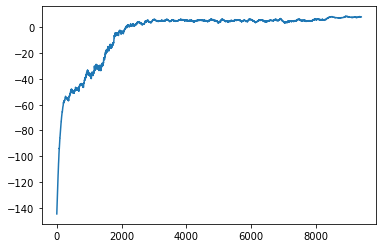

5th percentile = 7.38
95th percentile = 8.45
Avg reward = 7.884304304304305
Illegal actions in last 1000 = 0


In [4]:
# Run Q-learning and check rubrics:
estimated_returns_tbl, rewards, had_illegal_action = q_learning(global_taxi, MY_HYPER_PARAMS)

# Calculate a moving average over a sliding window of 100 episodes 
windowed_rewards = np.convolve(rewards, np.ones(100)/100, 'valid')
plt.plot(windowed_rewards[500:])
plt.show()

last_1000_start_idx = MY_HYPER_PARAMS['n_episodes'] - 100 - 1000
avg_reward_last_1000 = windowed_rewards[last_1000_start_idx:(last_1000_start_idx+999)]

avg_reward_5p = np.quantile(avg_reward_last_1000,.05)
avg_reward_95p = np.quantile(avg_reward_last_1000,.95)

print('5th percentile = '+str(avg_reward_5p))
print('95th percentile = '+str(avg_reward_95p))
print('Avg reward = '+str(np.mean(avg_reward_last_1000)))

illegal_actions = np.count_nonzero(had_illegal_action[last_1000_start_idx:])
print('Illegal actions in last 1000 = '+str(illegal_actions))

As seen above:
- the 5th percentile is 7.38>7.2
- the 95th percentile is 8.45>8.2
- no illegal actions are taken in the last 1000 episodes